## Import das bibliotecas

In [3]:
#import do pandas
import pandas as pd

## Crie um novo dataframe com .csv orders.

In [5]:
#criar novo dataframe a partir de um .csv
df = pd.read_csv('orders.csv')
df.head()

,order_id,store_id,channel_id,payment_order_id,delivery_order_id,order_status,order_amount,order_delivery_fee,order_delivery_cost,order_created_hour,...,order_moment_delivering,order_moment_delivered,order_moment_finished,order_metric_collected_time,order_metric_paused_time,order_metric_production_time,order_metric_walking_time,order_metric_expediton_speed_time,order_metric_transit_time,order_metric_cycle_time
0,68405119,3512,5,68405119,68405119,CANCELED,62.7,0.0,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,68405123,3512,5,68405123,68405123,CANCELED,62.7,0.0,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,68405206,3512,5,68405206,68405206,CANCELED,115.5,0.0,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,68405465,3401,5,68405465,68405465,CANCELED,55.9,0.0,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,68406064,3401,5,68406064,68406064,CANCELED,37.9,0.0,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Quantos registros temos na nossa base?

In [7]:
#quantidade de registros no dataframe
len(df)

368999

## Há dados faltantes na nossa base?

In [9]:
#informações sobre o dataframe
dados_faltantes = df.isnull().sum()
print(dados_faltantes)

order_id                                  0
store_id                                  0
channel_id                                0
payment_order_id                          0
delivery_order_id                         0
order_status                              0
order_amount                              0
order_delivery_fee                        0
order_delivery_cost                    7205
order_created_hour                        0
order_created_minute                      0
order_created_day                         0
order_created_month                       0
order_created_year                        0
order_moment_created                      0
order_moment_accepted                  9461
order_moment_ready                    25106
order_moment_collected                42894
order_moment_in_expedition            67429
order_moment_delivering               25316
order_moment_delivered               349398
order_moment_finished                 15599
order_metric_collected_time     

## Desde quando temos esse histórico?

In [69]:
#type da coluna de data
print(df['order_moment_created'].dtype)

object


In [73]:
#min da coluna de data
min_data = df['order_moment_created'].min()
min_data

'1/1/2021 10:00:35 PM'

In [75]:
#max da coluna de data
min_data = df['order_moment_created'].max()
min_data

'4/9/2021 9:59:54 PM'

In [81]:
#cast da coluna de data para o formato correto
df['order_moment_created'] = pd.to_datetime(df['order_moment_created'])
df['order_moment_created']

0        2021-01-01 00:01:36
1        2021-01-01 00:04:26
2        2021-01-01 00:13:07
3        2021-01-01 00:19:15
4        2021-01-01 00:26:25
                 ...        
368994   2021-04-30 23:59:32
368995   2021-04-30 23:59:39
368996   2021-04-30 23:59:41
368997   2021-04-30 23:59:42
368998   2021-04-30 23:59:48
Name: order_moment_created, Length: 368999, dtype: datetime64[ns]

In [83]:
#min da coluna de data
min_data = df['order_moment_created'].min()
min_data

Timestamp('2021-01-01 00:01:36')

In [85]:
#max da coluna de data
min_data = df['order_moment_created'].max()
min_data

Timestamp('2021-04-30 23:59:48')

## Quantas lojas atendemos na nossa base?


In [87]:
#contagem das lojas únicas
unique_stores = df['store_id'].nunique()
print(f"Número de lojas únicas: {unique_stores}")

Número de lojas únicas: 951


## Quais são as principais lojas em quantidade de atendimento?


In [89]:
#ranking das maiores lojas por pedidos

store_orders_count = df.groupby('store_id').size()
sorted_stores = store_orders_count.sort_values(ascending=False)

print(sorted_stores)


store_id
53      14004
676     12327
707      9271
149      8110
274      7920
        ...  
2545        1
2043        1
1875        1
1899        1
3394        1
Length: 951, dtype: int64


In [93]:
#group by com contagem agregada

orders_count_per_store = df.groupby('store_id').size().reset_index(name='order_count')
orders_sum_per_store = df.groupby('store_id')['order_amount'].sum().reset_index(name='total_amount')

result = pd.merge(orders_count_per_store, orders_sum_per_store, on='store_id')

print(result)

     store_id  order_count  total_amount
0           3           13        623.60
1           6         3739     192522.20
2           8         2472     103441.77
3          53        14004     940857.74
4          54           89       6887.60
..        ...          ...           ...
946      4669            3        892.76
947      4671            1        269.90
948      4675            3        629.60
949      4676            1         64.90
950      4679           89       4210.47

[951 rows x 3 columns]


## Qual a distribuição entre os status?

In [95]:
status_distribution = df.groupby('order_status').size().reset_index(name='count')

print(status_distribution)


  order_status   count
0     CANCELED   16979
1     FINISHED  352020


In [97]:
#distribuição entre status por porcentagem
total_pedidos = len(df)

status_count = df['order_status'].value_counts()

status_percentage = (status_count / total_pedidos) * 100

status_distribution_percentage = status_percentage.reset_index()
status_distribution_percentage.columns = ['order_status', 'percentage']

print(status_distribution_percentage)

  order_status  percentage
0     FINISHED   95.398633
1     CANCELED    4.601367


## Qual o nome das lojas da tabela orders?

In [109]:
#criação de um novo dataframe a partir de stores
df = pd.read_csv('stores.csv', encoding="iso-8859-1")

In [111]:
#informações sobre o dataframe
df.head()

,store_id,hub_id,store_name,store_segment,store_plan_price,store_latitude,store_longitude
0,3,2,CUMIURI,FOOD,0.0,NaN,NaN
1,6,3,PIMGUCIS DA VIVA,FOOD,0.0,-30.037415,-51.203520
2,8,3,RASMUR S,FOOD,0.0,-30.037415,-51.203520
3,53,8,PAPA SUCIS,FOOD,0.0,-22.921475,-43.234822
4,54,8,VUZPI PAZZIS,FOOD,0.0,-22.921475,-43.234822


In [123]:
stores_df = df[['store_id', 'store_name']]

stores_df

,store_id,store_name
0,3,CUMIURI
1,6,PIMGUCIS DA VIVA
2,8,RASMUR S
3,53,PAPA SUCIS
4,54,VUZPI PAZZIS
...,...,...
946,4669,CIRUMOI
947,4671,CIRUMOI
948,4675,SIMUI LIMOI
949,4676,PAMACIS


In [129]:
#merge/join com orders
orders_df = pd.read_csv("orders.csv")
merged_df = pd.merge(orders_df, stores_df, on='store_id')

print(merged_df.head())

   order_id  store_id  channel_id  payment_order_id  delivery_order_id  \
0  68405119      3512           5          68405119           68405119   
1  68405123      3512           5          68405123           68405123   
2  68405206      3512           5          68405206           68405206   
3  68405465      3401           5          68405465           68405465   
4  68406064      3401           5          68406064           68406064   

  order_status  order_amount  order_delivery_fee  order_delivery_cost  \
0     CANCELED          62.7                 0.0                  NaN   
1     CANCELED          62.7                 0.0                  NaN   
2     CANCELED         115.5                 0.0                  NaN   
3     CANCELED          55.9                 0.0                  NaN   
4     CANCELED          37.9                 0.0                  NaN   

   order_created_hour  ...  order_moment_delivered  order_moment_finished  \
0                   0  ...             

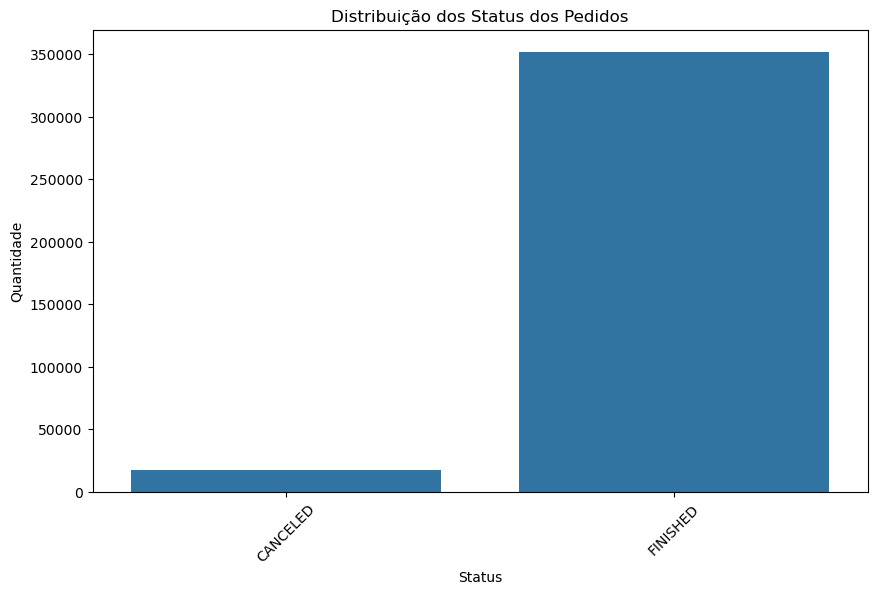

In [135]:
#análise dos registros
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(data=merged_df, x='order_status')
plt.title('Distribuição dos Status dos Pedidos')
plt.xlabel('Status')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)
plt.show()

In [141]:
#informações sobre o dataframe
merged_df.dtypes

order_id                               int64
store_id                               int64
channel_id                             int64
payment_order_id                       int64
delivery_order_id                      int64
order_status                          object
order_amount                         float64
order_delivery_fee                   float64
order_delivery_cost                  float64
order_created_hour                     int64
order_created_minute                   int64
order_created_day                      int64
order_created_month                    int64
order_created_year                     int64
order_moment_created                  object
order_moment_accepted                 object
order_moment_ready                    object
order_moment_collected                object
order_moment_in_expedition            object
order_moment_delivering               object
order_moment_delivered                object
order_moment_finished                 object
order_metr

In [143]:
#group by com contagem agregada
grouped_df = merged_df.groupby('store_id').size().reset_index(name='count')

print(grouped_df)

     store_id  count
0           3     13
1           6   3739
2           8   2472
3          53  14004
4          54     89
..        ...    ...
946      4669      3
947      4671      1
948      4675      3
949      4676      1
950      4679     89

[951 rows x 2 columns]


In [149]:
#cast como string
merged_df_str = merged_df.astype(str)

print(merged_df_str)


        order_id store_id channel_id payment_order_id delivery_order_id  \
0       68405119     3512          5         68405119          68405119   
1       68405123     3512          5         68405123          68405123   
2       68405206     3512          5         68405206          68405206   
3       68405465     3401          5         68405465          68405465   
4       68406064     3401          5         68406064          68406064   
...          ...      ...        ...              ...               ...   
368994  93139806     2074          5         93139806          93139806   
368995  93139809      707          5         93139809          93139809   
368996  93139813      631          5         93139813          93139813   
368997  93139814      631          5         93139814          93139814   
368998  93139817      236          5         93139817          93139817   

       order_status order_amount order_delivery_fee order_delivery_cost  \
0          CANCELED     

In [161]:
#procura as lojas em stores
result = merged_df[merged_df['store_name'] == 'FRUEOU ']

print(result)

        order_id  store_id  channel_id  payment_order_id  delivery_order_id  \
3       68405465      3401           5          68405465           68405465   
4       68406064      3401           5          68406064           68406064   
2158    68663309      3402           5          68663309           68663309   
2168    68663637      3402           5          68663637           68663637   
2512    68697028      3401           5          68697028           68697028   
...          ...       ...         ...               ...                ...   
367048  93130593      3404           5          93130593           93130593   
367087  93130847      3404           5          93130847           93130847   
367307  93133199      3403           5          93133199           93133199   
368105  93136530      3401          15          93136530           93136530   
368584  93138404      3403           5          93138404           93138404   

       order_status  order_amount  order_delivery_f

In [163]:
#remove os espaços nas bordas
merged_df['store_name'] = merged_df['store_name'].str.strip()
print(merged_df['store_name'].head())

0    GOI SIPIMUSU
1    GOI SIPIMUSU
2    GOI SIPIMUSU
3          FRUEOU
4          FRUEOU
Name: store_name, dtype: object


In [167]:
#procura as lojas em stores
result = merged_df[merged_df['store_name'] == 'FRUEOU']

print(result)

        order_id  store_id  channel_id  payment_order_id  delivery_order_id  \
3       68405465      3401           5          68405465           68405465   
4       68406064      3401           5          68406064           68406064   
2158    68663309      3402           5          68663309           68663309   
2168    68663637      3402           5          68663637           68663637   
2512    68697028      3401           5          68697028           68697028   
...          ...       ...         ...               ...                ...   
367048  93130593      3404           5          93130593           93130593   
367087  93130847      3404           5          93130847           93130847   
367307  93133199      3403           5          93133199           93133199   
368105  93136530      3401          15          93136530           93136530   
368584  93138404      3403           5          93138404           93138404   

       order_status  order_amount  order_delivery_f

#Exercícios

## 1 - Quais lojas possuem mais valores repedidos em df_stores?

In [190]:
df_stores = pd.read_csv('stores.csv', encoding="iso-8859-1")
store_name_counts = df_stores['store_name'].value_counts()
repeated_store_names = store_name_counts[store_name_counts > 1]

print(repeated_store_names.head())


store_name
SALITO            17
GRIME CRU         16
CIRACIOU          14
IUMPICA           14
CISI PIUEUEMI     12
Name: count, dtype: int64


## 2 - Quais lojas possuem maior valor de pedidos?

In [193]:
df_stores

,store_id,hub_id,store_name,store_segment,store_plan_price,store_latitude,store_longitude
0,3,2,CUMIURI,FOOD,0.0,NaN,NaN
1,6,3,PIMGUCIS DA VIVA,FOOD,0.0,-30.037415,-51.203520
2,8,3,RASMUR S,FOOD,0.0,-30.037415,-51.203520
3,53,8,PAPA SUCIS,FOOD,0.0,-22.921475,-43.234822
4,54,8,VUZPI PAZZIS,FOOD,0.0,-22.921475,-43.234822
...,...,...,...,...,...,...,...
946,4669,21,CIRUMOI,GOOD,29.0,-23.550407,-46.721291
947,4671,25,CIRUMOI,GOOD,49.9,-23.570765,-46.642043
948,4675,13,SIMUI LIMOI,GOOD,29.0,-22.887521,-43.283366
949,4676,75,PAMACIS,GOOD,49.9,-25.477073,-49.289660


## 3 - Quais lojas tem o maior tempo de produção do pedido?

## 4 - Num cenário de negócio, quais alternativas você recomenda para diminuir o tempo de produção dos pedidos?
Pode utilizar o Google, ChatGPT para pesquisar sobre o assunto. Consegue indicar algum artigo ciêntifíco, reposítório, ou análise no Kaggle que já tratou sobre este problema?

## 5 - Quais são os principais Shoppings/Cidades em número de Pedidos. Faça o upload do .csv de hubs e realize os joins entre os dataframes de orders, stores e hubs para chegar no resultado.